In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# load the raw data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print('shape of the training data:', X_train.shape)
print('shape of the target data:', y_train.shape)


shape of the training data: (3320, 150, 150)
shape of the target data: (3320,)


# New Section

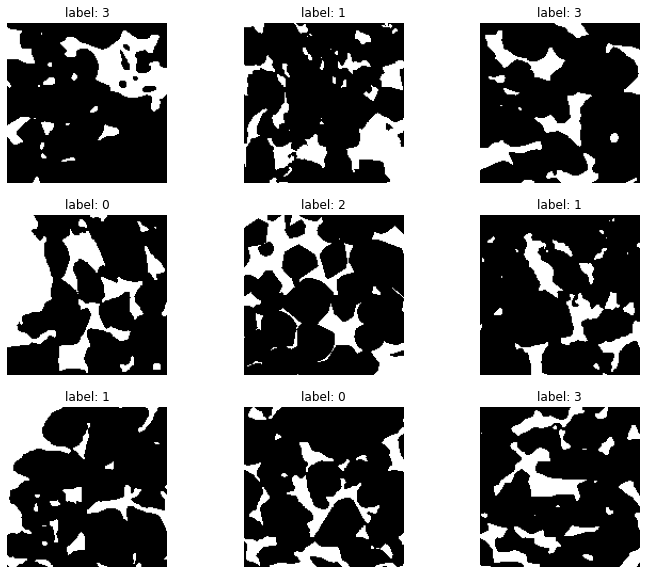

In [4]:
# preview some of the training images
plt.figure(figsize=(12,10))
x, y =3, 3
for i in range(9):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i,:,:],cmap='gray')
    plt.title('label: {}'.format(y_train[i]))
    plt.axis('off')
plt.show()

In [5]:
# analyze data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X_train = X_train.astype('float32')
y_train = keras.utils.to_categorical(y_train, 4) #one-hot labal for data

# set up neural network
op=tf.keras.optimizers.Adam()
model = Sequential()
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

In [ ]:
# train you model
model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=13, batch_size=32)

Epoch 1/13
  4/104 [>.............................] - ETA: 1:00:35 - loss: 1.7749 - accuracy: 0.3047

In [ ]:
# load the test data
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/X_test.npy')
print('shape of the test data:', X_test.shape)

In [ ]:
# make prediction for the test data
y_test=model.predict(X_test)
max_index = np.argmax(y_test, axis=1)# chooseing the type with biggest possibility

In [ ]:
# create sample submission (random)
import pandas as pd
sample_submission = pd.DataFrame(max_index, columns = ['Category'])
sample_submission.insert(0, 'Id', sample_submission.index)
sample_submission.head(20)
sample_submission.to_csv('submission.csv',index=False)